In [4]:
import torch
from word2vec_models import CBOW
import pickle
from tqdm import tqdm

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
#Load cleaned words and dictionary
with open('../data/cleaned_words.pickle', 'rb') as handle:
    corpus = pickle.load(handle)
with open('../data/word_to_ix.pickle', 'rb') as handle:
    word_to_ix = pickle.load(handle)
with open('../data/ix_to_word.pickle', 'rb') as handle:
    ix_to_word = pickle.load(handle)
vocab_size = len(word_to_ix)

In [7]:
########################################################################
# Import best performing model
model_path = '../../../../Assignment3_embeddings/cbow_d200_cs_2_5.pth'

checkpoint = torch.load(f=model_path, map_location=torch.device('cpu'))

In [8]:
net = CBOW(vocab_size, 200, 4)

In [9]:
net.load_state_dict(checkpoint['model_state_dict'])
net.eval()

CBOW(
  (embeddings): Embedding(253702, 200)
  (fc1): Linear(in_features=800, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=253702, bias=True)
)

In [10]:
net.ix_to_embeddding(torch.tensor([word_to_ix['abuse']],dtype=torch.long))

tensor([[ 1.0732,  1.2917,  2.0937,  1.3487,  0.0374,  0.4524, -0.6270, -1.3388,
          0.4957, -0.1474,  1.9259,  0.2501,  0.4419, -1.7533,  0.9626,  1.8240,
         -0.3321, -0.5385,  1.6823,  0.1912,  0.7805,  0.0070,  0.1277,  1.2466,
         -2.5628, -0.0333,  0.1305, -0.0085,  0.6107,  1.4130,  0.3908, -2.9506,
         -1.1314, -1.7081, -1.7421,  1.6952,  1.0012, -0.1844, -0.6889,  0.5561,
          0.3389,  0.4048, -1.6004, -0.5738,  0.2808, -0.9116,  0.2617,  0.6170,
          0.0895,  2.1909,  0.3945, -1.1340, -0.4845,  1.1066,  0.8350,  0.8874,
          0.0144, -0.4764,  0.5189, -1.9191, -0.0969, -1.4984, -1.8588, -1.0888,
          0.5303,  1.0519, -0.8835,  0.0838,  0.3950, -0.4913, -0.6206, -1.9341,
         -2.0931,  0.5690,  0.1649,  0.2824, -1.9332, -0.4559,  0.5116,  1.7430,
          0.4555,  0.0181,  0.4859,  0.9109, -0.5896, -1.0105, -0.6419, -1.0987,
         -0.2870,  0.3602,  1.0789,  1.1123,  0.1244,  0.3742, -0.1823, -0.6479,
          0.7891,  0.4518,  

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [12]:
# getting embeddings from the embedding layer of our model, by name
embeddings = net.embeddings.weight.to('cpu').data.numpy()

In [13]:
viz_words = 500
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings[:viz_words, :])

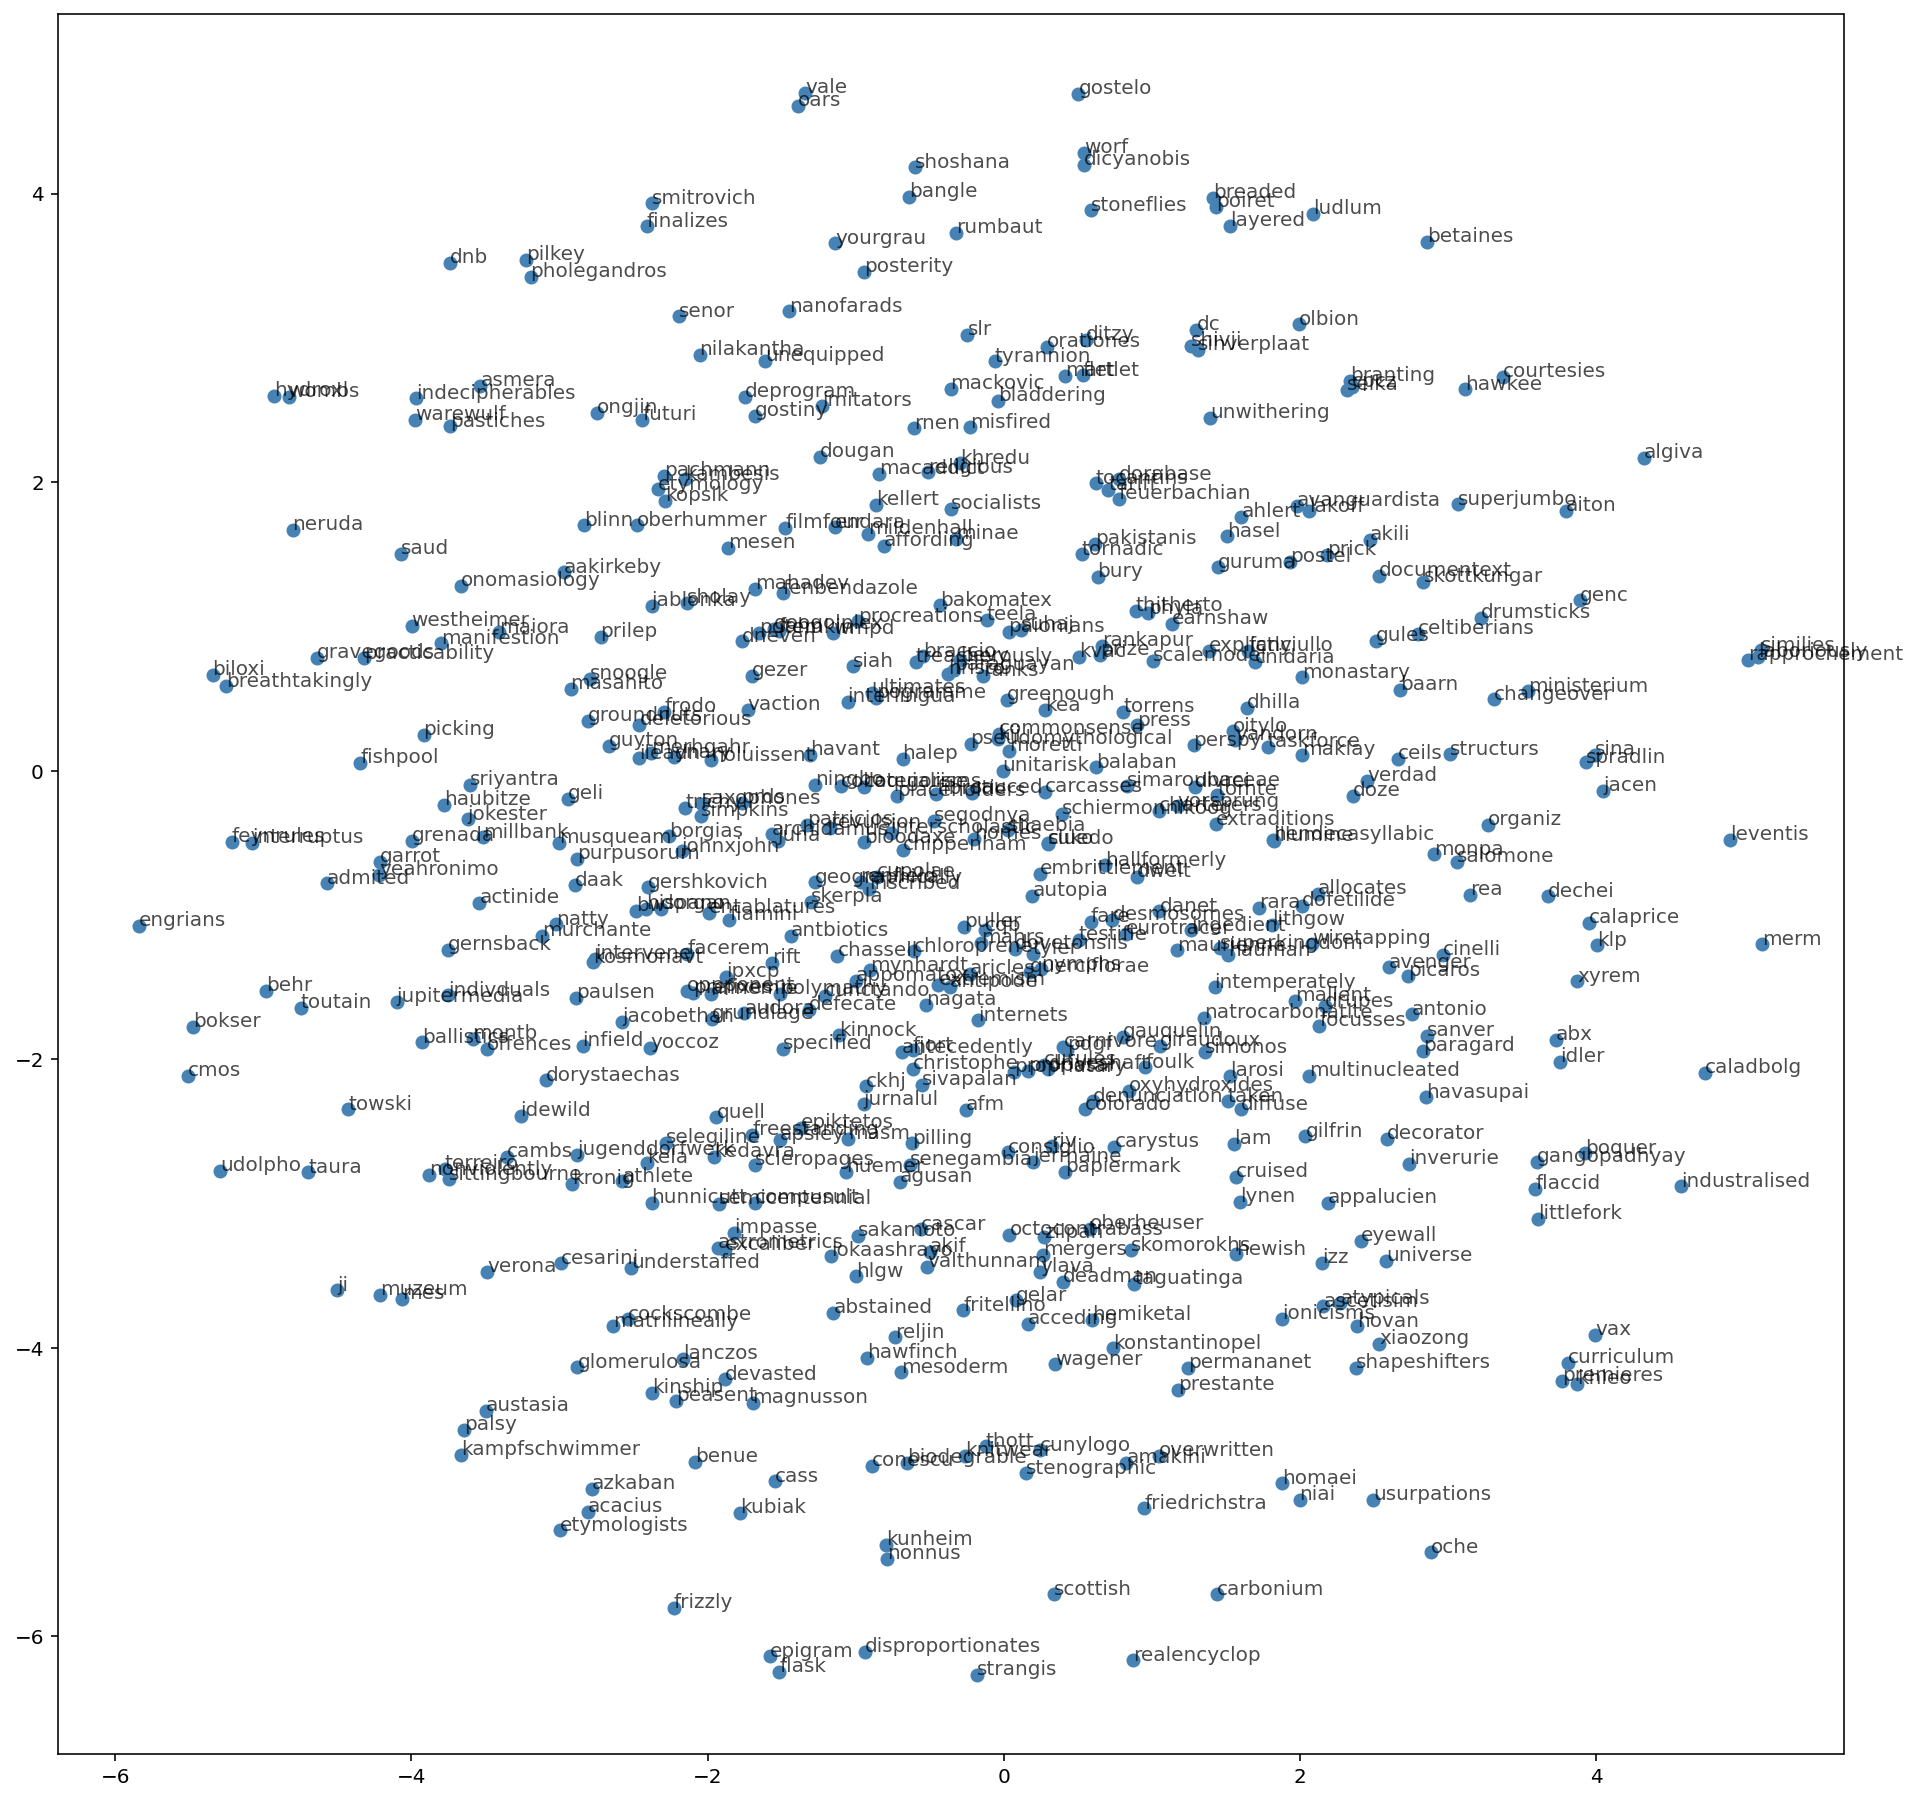

In [14]:
fig, ax = plt.subplots(figsize=(16, 16))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(ix_to_word[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

In [15]:
len(corpus)

10890638

In [16]:
import pandas as pd

In [17]:
columns = ['Context','Target']
train_data = []
for i in tqdm(range(2,4000)):
    context = word_to_ix[corpus[i]]
    for j in range(1, 2+1):
        target = word_to_ix[corpus[i-j]]
        train_data.append((context,target))
        target = word_to_ix[corpus[i+j]]
        train_data.append((context,target))
t = torch.tensor(train_data,dtype=torch.long)
print(t.shape)

100%|██████████| 3998/3998 [00:00<00:00, 145471.82it/s]

torch.Size([15992, 2])


In [18]:
trl = torch.utils.data.DataLoader(t,batch_size=2000,shuffle=False)

In [19]:
for inp in trl:
    o = inp[:,0][:,None]
    print(o.shape)
    break

torch.Size([2000, 1])
